# Linear Regression : Iris Flower Dataset

## Import Libraries

In [91]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt                  #for simple graphs
import seaborn as sns                            #complex visualization

from scipy.stats import shapiro, kstest, normaltest       #hypothesis testing
import statsmodels.api as sm                              #qqplot
 
from statsmodels.stats.outliers_influence import variance_inflation_factor      #to check no multicolinearity

from sklearn.model_selection import train_test_split          #split training and testing data
from sklearn.linear_model import LinearRegression             #import model from linear models

from sklearn.datasets import load_iris

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     #evaluation metrics
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, multilabel_confusion_matrix, classification_report

## 1. Problem Statement

## 2. Data Gathering

In [2]:
#through file
df = pd.read_json(r"C:\Users\hp\Desktop\ClassRoom_Notes\Machine Learning\datasets\iris.json")
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#through built in dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df["Species"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3. EDA : Exploratory Data Analysis

In [7]:
#check for size of data
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [9]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int32
dtype: object

In [10]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
#statastical information
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df["Species"].unique()

array([0, 1, 2])

In [13]:
#check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

<Axes: >

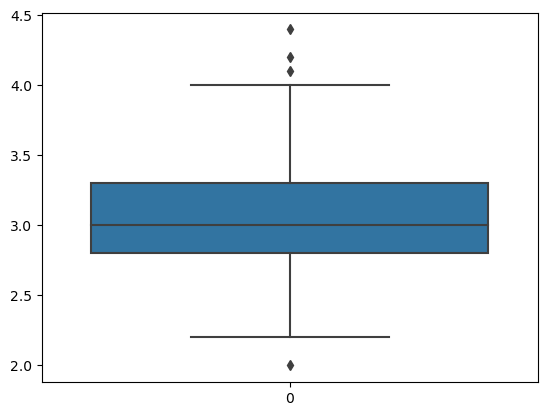

In [14]:
#check for outliers
sns.boxplot(df["sepal width (cm)"])

In [15]:
q1 = df["sepal width (cm)"].quantile(0.25) #25 quantile
q2 = df["sepal width (cm)"].quantile(0.50) #50 quantile
q3 = df["sepal width (cm)"].quantile(0.75) #75 quantile

#iqr: inter quartile range
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

In [16]:
lower_tail

2.05

In [17]:
upper_tail

4.05

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

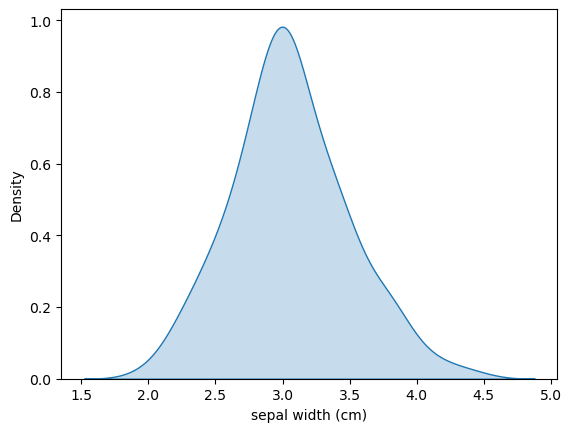

In [18]:
sns.kdeplot(df["sepal width (cm)"], fill =True)

## 4. Feature Engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 5. Feature Selection

### Assumption 1 : Linearity

In [20]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

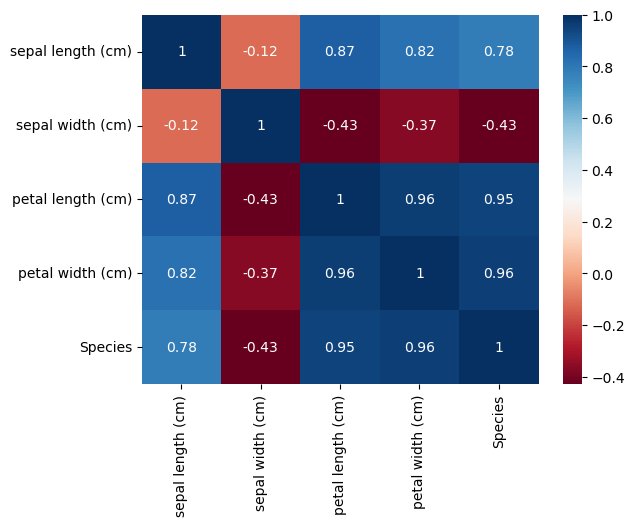

In [21]:
sns.heatmap(df.corr(), annot = True, cmap = "RdBu")

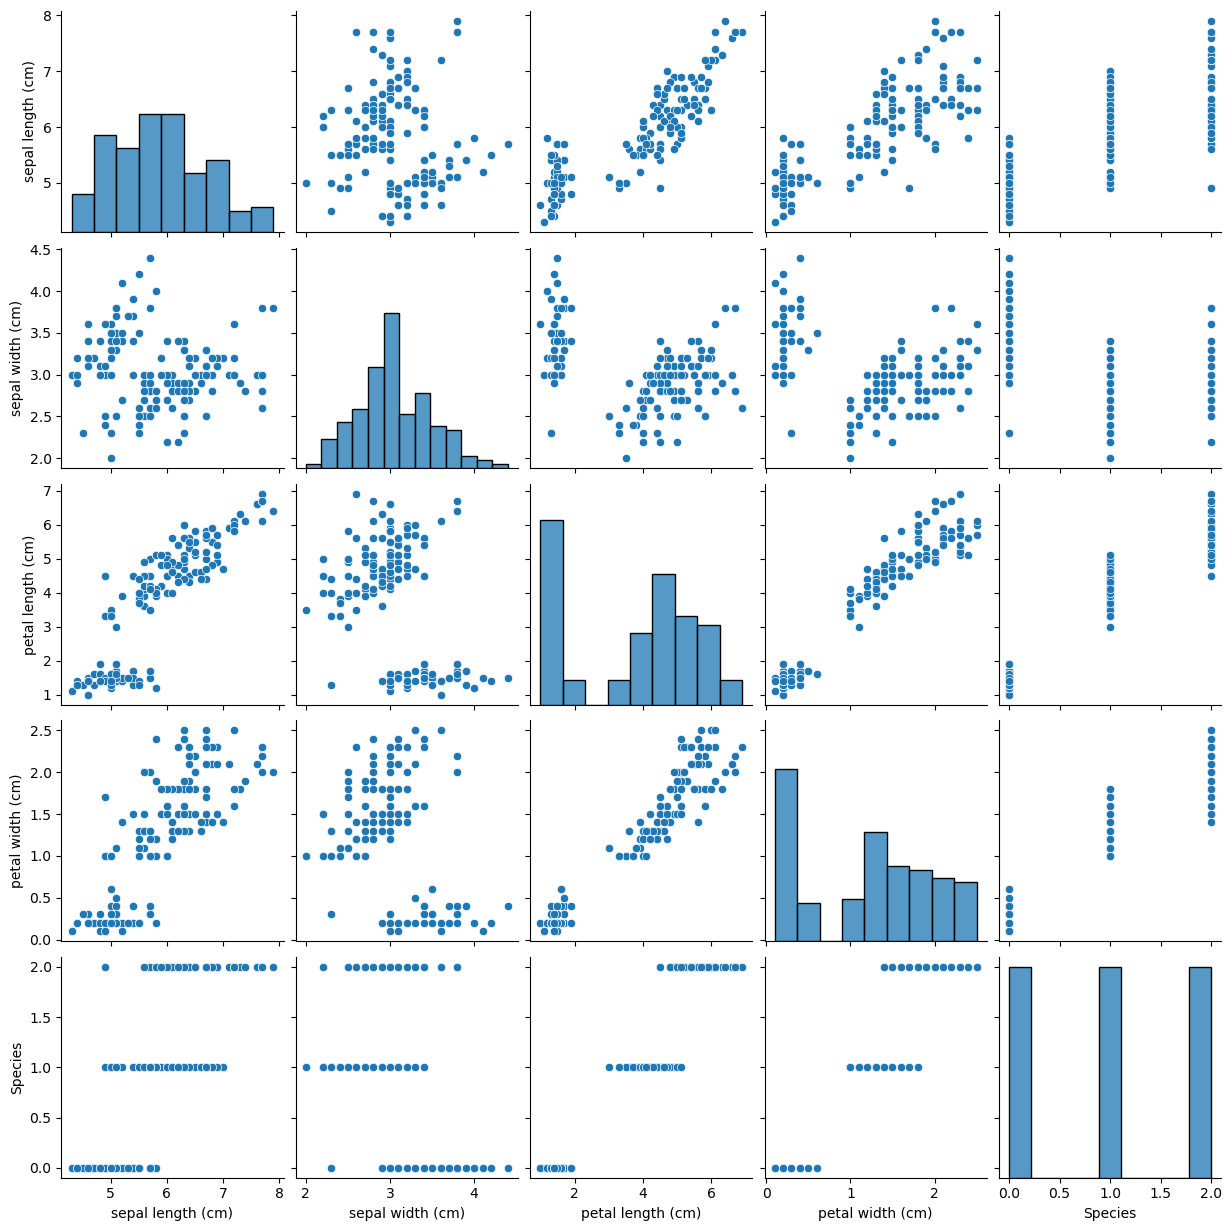

In [76]:
sns.pairplot(df)

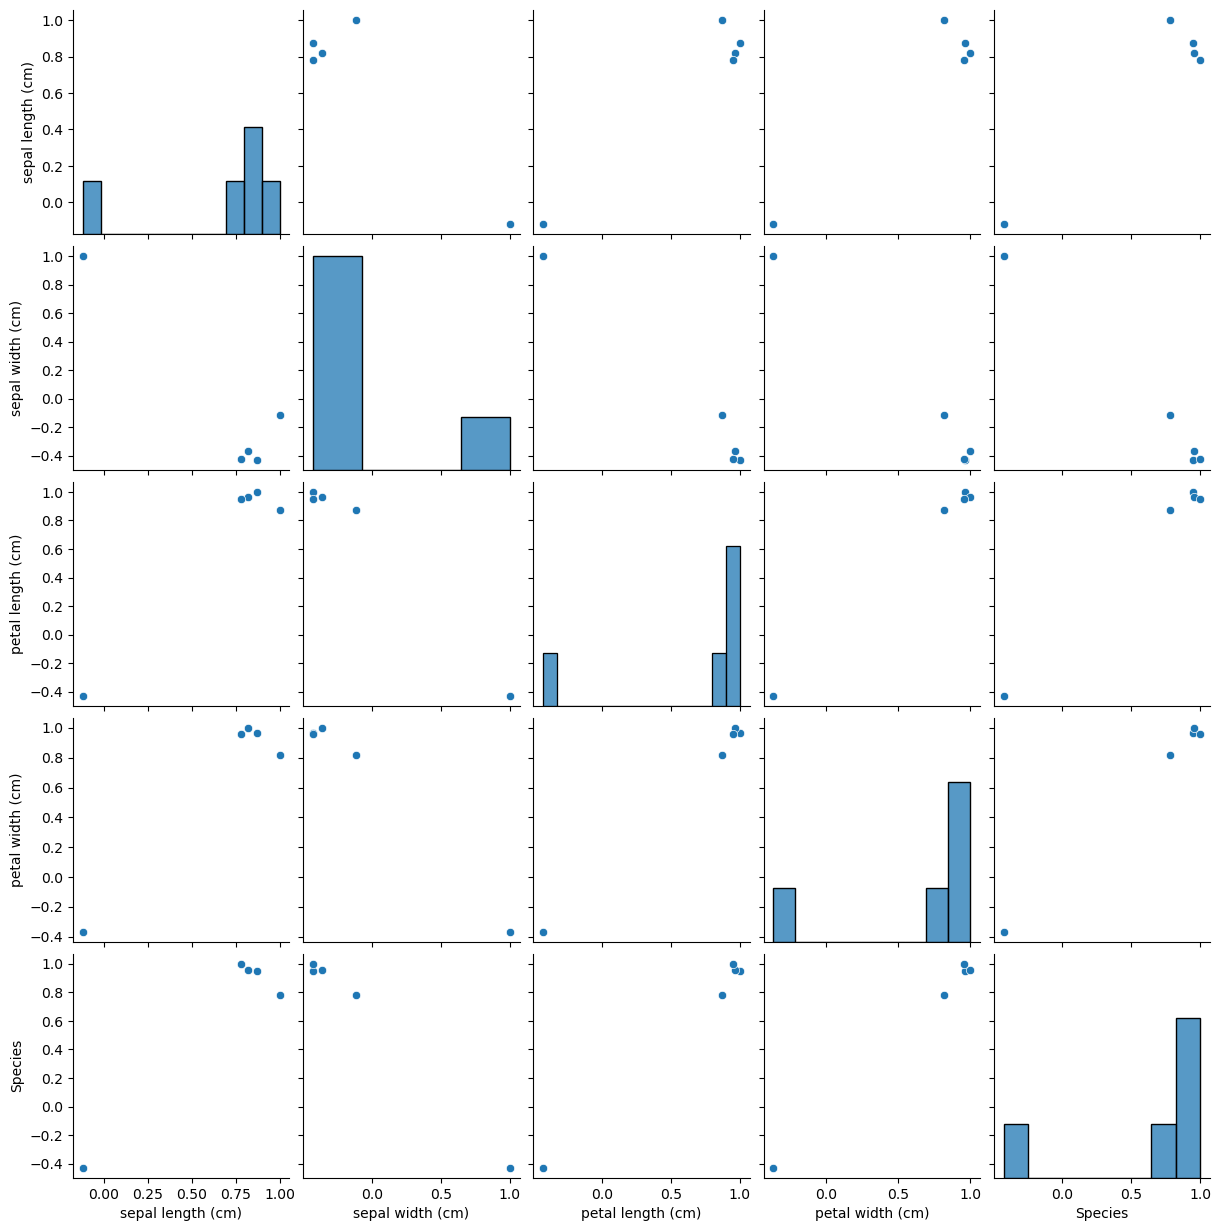

In [142]:
sns.pairplot(df.corr())

### Assumption 2 : No Multicolinearity

In [22]:
vif_df = pd.DataFrame()
df1 = df.iloc[:,1:]

vif_df["Features"] = df1.columns
vif_df

,Features
0,sepal width (cm)
1,petal length (cm)
2,petal width (cm)
3,Species


In [23]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list

[8.658996961562709, 69.86836735290225, 62.602076700773566, 35.0031533037486]

In [24]:
vif_df["VIF"] = vif_list
vif_df

,Features,VIF
0,sepal width (cm),8.658997
1,petal length (cm),69.868367
2,petal width (cm),62.602077
3,Species,35.003153


In [25]:
x = df1
y = df["sepal length (cm)"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [96]:
x_train

,sepal width (cm),petal length (cm),petal width (cm),Species
133,2.8,5.1,1.5,2
95,3.0,4.2,1.2,1
4,3.6,1.4,0.2,0
145,3.0,5.2,2.3,2
54,2.8,4.6,1.5,1
...,...,...,...,...
126,2.8,4.8,1.8,2
42,3.2,1.3,0.2,0
16,3.9,1.3,0.4,0
132,2.8,5.6,2.2,2


## 6. Model Training

In [57]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [58]:
lin_reg_model = lin_reg.fit(x_train,y_train)
lin_reg_model

LinearRegression()

In [59]:
x_train.head()

,sepal width (cm),petal length (cm),petal width (cm),Species
111,2.7,5.3,1.9,2
56,3.3,4.7,1.6,1
48,3.7,1.5,0.2,0
149,3.0,5.1,1.8,2
63,2.9,4.7,1.4,1


In [60]:
y_train.head()

111    6.4
56     6.3
48     5.3
149    5.9
63     6.1
Name: sepal length (cm), dtype: float64

In [61]:
y_train_predict = lin_reg_model.predict(x_train)
y_train_predict

array([6.22951741, 6.57873684, 5.20715542, 6.30744205, 6.39041883,
       5.48618504, 7.1240081 , 5.95354301, 6.62400184, 5.9632861 ,
       5.83503297, 5.10163359, 4.82889967, 7.90486598, 6.91296446,
       5.65015202, 5.45553831, 6.22645752, 5.90340079, 4.71201503,
       5.5024194 , 6.71004985, 6.3969101 , 5.34839109, 6.90484779,
       6.40178165, 6.48457784, 7.3269294 , 6.73440088, 6.29139395,
       5.01721768, 4.81753685, 6.28471074, 6.41134415, 5.44559965,
       5.80761638, 6.57204796, 7.21005611, 4.67630118, 6.51867196,
       6.58522811, 6.51685462, 6.20517205, 6.03813951, 5.14040267,
       5.94867146, 4.93604689, 5.41819906, 5.06591974, 6.19380923,
       4.60000193, 7.15809655, 5.63229226, 6.61751625, 4.72987479,
       6.07691892, 5.00098332, 7.34478917, 6.36588721, 4.94091843,
       5.07546624, 6.45192387, 6.5395916 , 6.24755776, 4.65357554,
       6.67757545, 4.94072751, 6.04463646, 5.42287401, 6.20859776,
       5.81879293, 4.88897022, 4.10973309, 4.80617403, 5.11300

In [62]:
residual = y_train - y_train_predict
residual

111    0.170483
56    -0.278737
48     0.092845
149   -0.407442
63    -0.290419
         ...   
22    -0.160723
143   -0.069140
106   -0.660678
101   -0.276919
42    -0.329875
Name: sepal length (cm), Length: 120, dtype: float64

### Assumption 3 : Normality of Residual

#### 1. Kdeplot

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

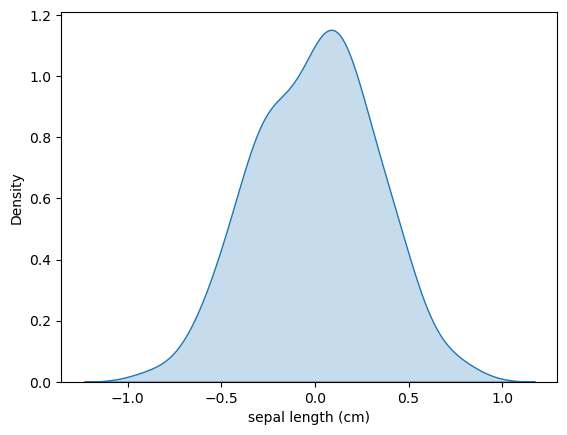

In [63]:
sns.kdeplot(residual, fill = True)

<Axes: ylabel='Density'>

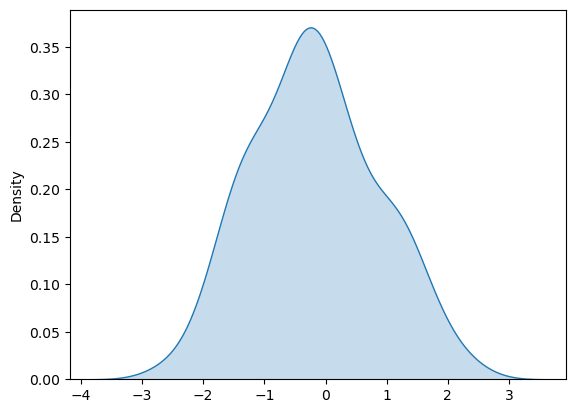

In [64]:
sns.kdeplot(np.random.randn(100), fill=True)

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

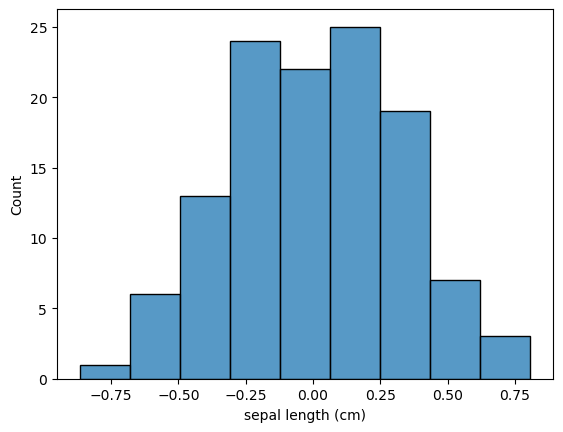

In [65]:
sns.histplot(residual)

In [66]:
np.mean(np.random.randn(100))

0.0005637740920105634

#### 2. shapiro test

In [67]:
p_val, stats = shapiro(residual)
print(p_val)
print(stats)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis(H0) is True")
    
else:
    print("Data is not Normally Distributed")
    print("Alternative Hypothesis(H1) is True")

0.9954314231872559
0.9672084450721741
Data is Normally Distributed
Null Hypothesis(H0) is True


#### 3. kstest

In [68]:
type(residual)

pandas.core.series.Series

In [69]:
# Kolmogorov-Smirnov test
p_val, stats = kstest(residual,"norm")
print(p_val)
print(stats)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis(H0) is True")
    
else:
    print("Data is not Normally Distributed")
    print("Alternative Hypothesis(H1) is True")

0.2769130067064932
1.2586369262338041e-08
Data is Normally Distributed
Null Hypothesis(H0) is True


#### 4. normal test

In [70]:
p_val, stats = normaltest(residual)
print(p_val)
print(stats)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis(H0) is True")
    
else:
    print("Data is not Normally Distributed")
    print("Alternative Hypothesis(H1) is True")

0.4179661491998675
0.811408968948607
Data is Normally Distributed
Null Hypothesis(H0) is True


#### 5. QQplot

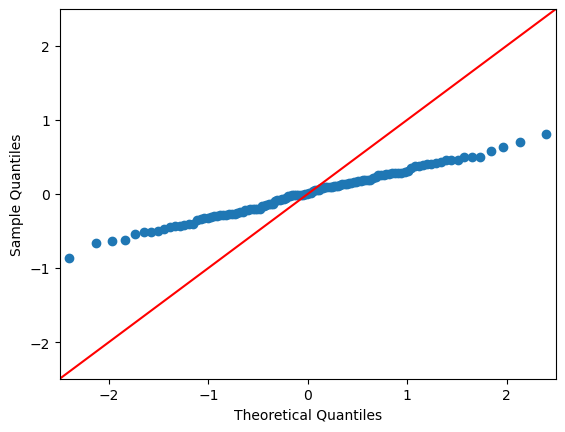

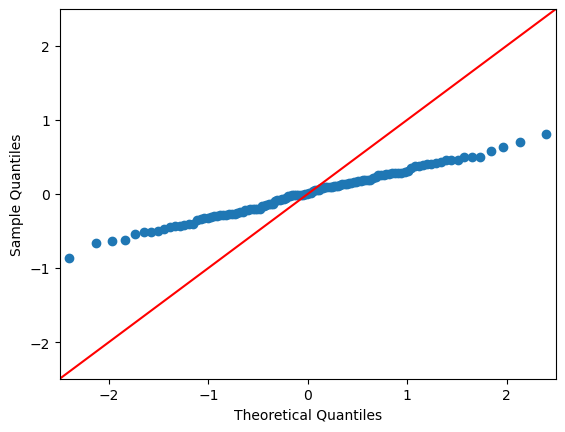

In [71]:
sm.qqplot(residual, line="45")

### Assumption 4 : Homoscadisticity

<Axes: ylabel='sepal length (cm)'>

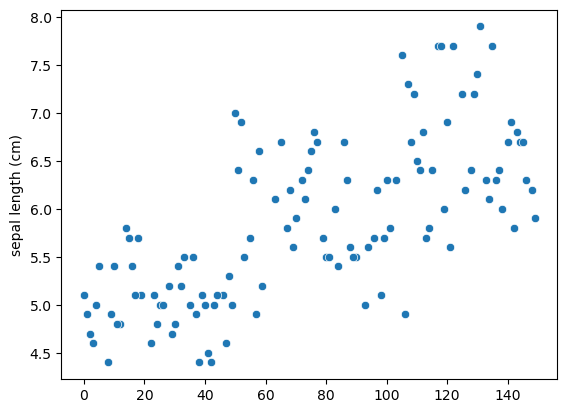

In [72]:
sns.scatterplot(y_train)

## 7. Model Evaluation

### for training data

In [85]:
print("*********** Evaluation Of Training Data ***************")
print("*"*54)

mse = mean_squared_error(y_train,y_train_predict)
print(f"Mean Squared Error = {mse}")
print("*"*54)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error = {rmse}")
print("*"*54)

mae = mean_absolute_error(y_train,y_train_predict)
print(f"Mean Squared Error = {mae}")
print("*"*54)

r2_score = r2_score(y_train,y_train_predict)
print(f"R2 Score = {r2_score}")
print("*"*54)

*********** Evaluation Of Training Data ***************
******************************************************
Mean Squared Error = 0.10043234257573447
******************************************************
Root Mean Squared Error = 0.31691062237756323
******************************************************
Mean Squared Error = 0.2576364942541211
******************************************************
R2 Score = 0.8623898997876629
******************************************************


In [86]:
y_test_predict = lin_reg_model.predict(x_test)
y_test_predict

array([6.61263903, 6.41621002, 6.31231359, 6.49107478, 5.03325545,
       6.03814519, 4.90033304, 5.73294254, 5.54462452, 6.85290525,
       5.13572772, 5.82710154, 6.21346931, 4.81753685, 6.15484356,
       6.81069446, 4.48311729, 5.07728256, 6.20210649, 5.58684099,
       5.16494462, 6.37905601, 4.64058733, 5.96003428, 6.69868136,
       6.26704292, 5.72157972, 6.49413466, 5.01234613, 6.14528674])

In [92]:
print("*********** Evaluation Of Testing Data ***************")
print("*"*54)

mse = mean_squared_error(y_test,y_test_predict)
print(f"Mean Squared Error = {mse}")
print("*"*54)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error = {rmse}")
print("*"*54)

mae = mean_absolute_error(y_test,y_test_predict)
print(f"Mean Absolute Error = {mae}")
print("*"*54)

r2_score = r2_score(y_test,y_test_predict)
print(f"R2 Score = {r2_score}")
print("*"*54)

*********** Evaluation Of Testing Data ***************
******************************************************
Mean Squared Error = 0.07012579142990635
******************************************************
Root Mean Squared Error = 0.2648127478614018
******************************************************
Mean Absolute Error = 0.21062280010958834
******************************************************
R2 Score = 0.8554570990131098
******************************************************


### Test model for data

In [76]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0


In [77]:
df_test = pd.DataFrame(df.iloc[[0],1:])
df_test

,sepal width (cm),petal length (cm),petal width (cm),Species
0,3.5,1.4,0.2,0


In [78]:
lin_reg_model.predict(df_test)

array([5.00098332])

### test for user accepted input

In [79]:
df_test = pd.DataFrame({"sepal width (cm)"  : [7.5],
                        "petal length (cm)" : [5.5],
                        "petal width (cm)"  : [3.5],
                        "Species" :[1]})
df_test

,sepal width (cm),petal length (cm),petal width (cm),Species
0,7.5,5.5,3.5,1


In [80]:
print(f"Sepal Length = {lin_reg_model.predict(df_test)[0]} cm")

Sepal Length = 9.237897619313678 cm


In [81]:
def prediction(sepal_width, petal_length, petal_width, species):
    df_test = pd.DataFrame({"sepal width (cm)"  : [sepal_width],
                        "petal length (cm)" : [petal_length],
                        "petal width (cm)"  : [petal_width],
                        "Species" :[species]})
    print(df_test)
    return (f"Sepal Length = {lin_reg_model.predict(df_test)[0]} cm")

In [150]:
prediction(7,6,5,1)

   sepal width (cm)  petal length (cm)  petal width (cm)  Species
0                 7                  6                 5        1


'Sepal Length = 8.65987886097071 cm'

In [151]:
prediction(6.5,3.5,6,2)

   sepal width (cm)  petal length (cm)  petal width (cm)  Species
0               6.5                3.5                 6        2


'Sepal Length = 5.676781186170922 cm'

In [152]:
prediction(2.5,2.5,2.5,0)

   sepal width (cm)  petal length (cm)  petal width (cm)  Species
0               2.5                2.5               2.5        0


'Sepal Length = 4.312121365185463 cm'

# Logistic regression (Multiclass Classification)

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [100]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg

LogisticRegression(multi_class='ovr')